# Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

# Linear SVM Classification

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))

#print(iris['DESCR'])
print(iris['target_names'])
print(iris['feature_names'])

print(iris['data'][:3])
print(iris['target'])
print(len(iris['data']))
print(len(iris['target']))
# 0 = Iris-Setosa
# 1 = Iris-Versicolour
# 2 = Iris-Virginica

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150
150


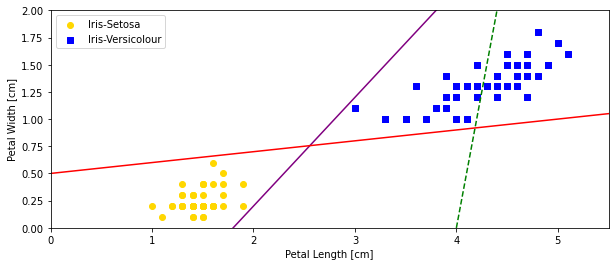

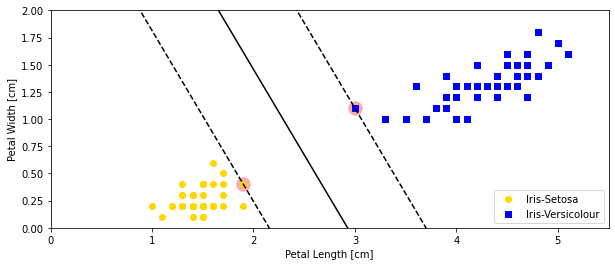

In [3]:
X = iris['data'][:, (2, 3)] # petal length (cm), petal width (cm)
y = iris['target']

fig, axes = plt.subplots(figsize = (10, 4))
axes.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color = 'gold', marker = 'o', label = 'Iris-Setosa')
axes.scatter(x = X[y == 1, 0], y = X[y == 1, 1], color = 'blue', marker = 's', label = 'Iris-Versicolour')
#axes.scatter(x = X[y == 2, 0], y = X[y == 2, 1], color = 'green', marker = '^', label = 'Iris-Virginica')
axes.set_xlabel('Petal Length [cm]')
axes.set_ylabel('Petal Width [cm]')

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5
axes.plot(x0, pred_1, color = 'green', linestyle = 'dashed')
axes.plot(x0, pred_2, color = 'purple', linestyle = 'solid')
axes.plot(x0, pred_3, color = 'red', linestyle = 'solid')

axes.set_xlim(0, 5.5)
axes.set_ylim(0, 2)
axes.legend()
plt.show()

def plot_svc_decision_boundary(axes, svm_clf, xmin, xmax):
    weights = svm_clf.coef_[0]
    bias = svm_clf.intercept_[0]
    
    # Ath the decision boundary, w0 * x0 + w1 * x1 + bias = 0
    # => x1 = -1 * (w0 * x0 + bias) / w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -1 * (weights[0] * x0 + bias) / weights[1]
    
    margin = 1 / weights[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    axes.scatter(svs[:, 0], svs[:, 1], s = 180, facecolors = '#FFAAAA', zorder = 0)
    axes.plot(x0, decision_boundary, color = 'black', linestyle = 'solid')
    axes.plot(x0, gutter_up, color = 'black', linestyle = 'dashed')
    axes.plot(x0, gutter_down, color = 'black', linestyle = 'dashed')
    
setosa_or_versicolour = (y == 0) | (y == 1)
X = X[setosa_or_versicolour]
y = y[setosa_or_versicolour]

from sklearn.svm import SVC
svm_clf = SVC(kernel = 'linear', C = float('inf'))
svm_clf.fit(X = X, y = y)

fig, axes = plt.subplots(figsize = (10, 4))
axes.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color = 'gold', marker = 'o', label = 'Iris-Setosa')
axes.scatter(x = X[y == 1, 0], y = X[y == 1, 1], color = 'blue', marker = 's', label = 'Iris-Versicolour')
#axes.scatter(x = X[y == 2, 0], y = X[y == 2, 1], color = 'green', marker = '^', label = 'Iris-Virginica')
axes.set_xlabel('Petal Length [cm]')
axes.set_ylabel('Petal Width [cm]')

plot_svc_decision_boundary(axes, svm_clf, 0, 6)

axes.set_xlim(0, 5.5)
axes.set_ylim(0, 2)
axes.legend()
plt.show()

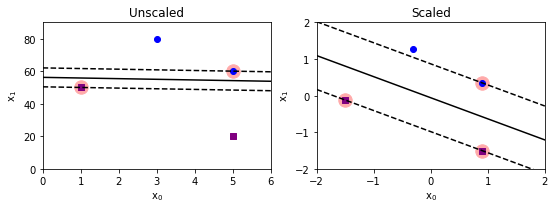

In [4]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel = 'linear', C = 100)
svm_clf.fit(X = Xs, y = ys)

fig, axes = plt.subplots(ncols = 2, figsize = (9, 2.7))

axes[0].scatter(x = Xs[ys == 0, 0], y = Xs[ys == 0, 1], color = 'purple', marker = 's')
axes[0].scatter(x = Xs[ys == 1, 0], y = Xs[ys == 1, 1], color = 'blue', marker = 'o')
plot_svc_decision_boundary(axes[0], svm_clf, 0, 6)
axes[0].set_title('Unscaled')
axes[0].set_xlabel('x$_{0}$')
axes[0].set_ylabel('x$_{1}$')
axes[0].set_xlim(0, 6)
axes[0].set_ylim(0, 90)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X = X_scaled, y = ys)

axes[1].scatter(x = X_scaled[ys == 0, 0], y = X_scaled[ys == 0, 1], color = 'purple', marker = 's')
axes[1].scatter(x = X_scaled[ys == 1, 0], y = X_scaled[ys == 1, 1], color = 'blue', marker = 'o')
plot_svc_decision_boundary(axes[1], svm_clf, -2, 2)
axes[1].set_title('Scaled')
axes[1].set_xlabel('x$_{0}$')
axes[1].set_ylabel('x$_{1}$')
axes[1].set_xlim(-2, 2)
axes[1].set_ylim(-2, 2)

plt.show()

# Soft Margin Classification

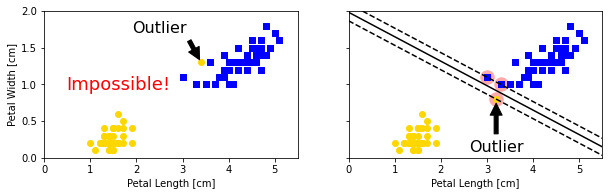

In [5]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

Xo1 = np.concatenate([X, X_outliers[:1]], axis = 0)
yo1 = np.concatenate([y, y_outliers[:1]], axis = 0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis = 0)
yo2 = np.concatenate([y, y_outliers[1:]], axis = 0)

fig, axes = plt.subplots(ncols = 2, figsize = (10, 2.7), sharey = True)

axes[0].scatter(x = Xo1[yo1 == 0, 0], y = Xo1[yo1 == 0, 1], color = 'gold', marker = 'o', label = 'Iris-Setosa')
axes[0].scatter(x = Xo1[yo1 == 1, 0], y = Xo1[yo1 == 1, 1], color = 'blue', marker = 's', label = 'Iris-Versicolour')
axes[0].text(x = 1.6, y = 1.0, s = 'Impossible!', fontsize = 18, color = 'red', horizontalalignment = 'center', verticalalignment = 'center')
axes[0].annotate(text = 'Outlier',
                 xy = (X_outliers[0][0], X_outliers[0][1]),
                 xytext = (2.5, 1.7),
                 horizontalalignment = 'center',
                 arrowprops = dict(facecolor = 'black', shrink = 0.1),
                 fontsize = 16)

axes[0].set_xlabel('Petal Length [cm]')
axes[1].set_xlabel('Petal Length [cm]')
axes[0].set_ylabel('Petal Width [cm]')
axes[0].set_xlim(0, 5.5)
axes[0].set_ylim(0, 2)

svm_clf2 = SVC(kernel = 'linear', C = 10**9)
svm_clf2.fit(X = Xo2, y = yo2)

axes[1].scatter(x = Xo2[yo2 == 0, 0], y = Xo2[yo2 == 0, 1], color = 'gold', marker = 'o', label = 'Iris-Setosa')
axes[1].scatter(x = Xo2[yo2 == 1, 0], y = Xo2[yo2 == 1, 1], color = 'blue', marker = 's', label = 'Iris-Versicolour')
axes[1].annotate(text = 'Outlier',
                 xy = (X_outliers[1][0], X_outliers[1][1]),
                 xytext = (3.2, 0.08),
                 horizontalalignment = 'center',
                 arrowprops = dict(facecolor = 'black', shrink = 0.1),
                 fontsize = 16)

plot_svc_decision_boundary(axes[1], svm_clf2, 0, 5.5)

axes[1].set_xlim(0, 5.5)
axes[1].set_ylim(0, 2)

plt.show()

In [6]:
X = iris['data'][:, (2, 3)] # petal length (cm), petal width (cm)
y = (iris['target'] == 2).astype(np.float64) # 1 if Iris-Virginica, else 0

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

svm_clf1 = LinearSVC(C = 1, loss = 'hinge', random_state = 42)
svm_clf2 = LinearSVC(C = 100, loss = 'hinge', random_state = 42)

scaled_svm_clf1 = Pipeline(steps = [
    ('scaler', scaler),
    ('linear_svc', svm_clf1)
])

scaled_svm_clf2 = Pipeline(steps = [
    ('scaler', scaler),
    ('linear_svc', svm_clf2)
])

scaled_svm_clf1.fit(X = X, y = y)
scaled_svm_clf2.fit(X = X, y = y)

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [7]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

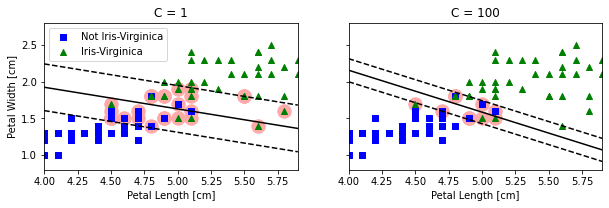

In [8]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 2.7), sharey = True)
axes[0].scatter(x = X[y == 0, 0], y = X[y == 0, 1], color = 'blue', marker = 's', label = 'Not Iris-Virginica')
axes[0].scatter(x = X[y == 1, 0], y = X[y == 1, 1], color = 'green', marker = '^', label = 'Iris-Virginica')
plot_svc_decision_boundary(axes[0], svm_clf1, 4, 5.9)
axes[0].set_xlabel('Petal Length [cm]')
axes[0].set_ylabel('Petal Width [cm]')
axes[0].set_title(f'C = {svm_clf1.C}')

axes[1].scatter(x = X[y == 0, 0], y = X[y == 0, 1], color = 'blue', marker = 's', label = 'Not Iris-Virginica')
axes[1].scatter(x = X[y == 1, 0], y = X[y == 1, 1], color = 'green', marker = '^', label = 'Iris-Virginica')
plot_svc_decision_boundary(axes[1], svm_clf2, 4, 5.9)
axes[1].set_xlabel('Petal Length [cm]')
axes[1].set_title(f'C = {svm_clf2.C}')

axes[0].set_xlim(4, 5.9)
axes[0].set_ylim(0.8, 2.8)
axes[1].set_xlim(4, 5.9)
axes[1].set_ylim(0.8, 2.8)

axes[0].legend()

plt.show()

In [9]:
X = iris['data'][:, (2, 3)] # petal length (cm), petal width (cm)
y = (iris['target'] == 2).astype(np.float64) # 1 if Iris-Virginica, else 0

svm_clf = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
])

svm_clf.fit(X = X, y = y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [10]:
svm_clf.predict([[4.0, 1.0], [5.5, 1.7], [5.5, 2.4]])

array([0., 1., 1.])

# Nonlinear SVM Classification

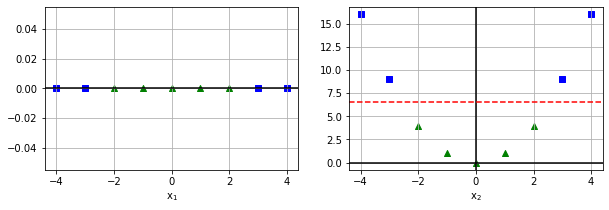

In [11]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

fig, axes = plt.subplots(ncols = 2, figsize = (10, 3))

axes[0].scatter(x = X1D[y == 0, 0], y = np.zeros(4), color = 'blue', marker = 's')
axes[0].scatter(x = X1D[y == 1, 0], y = np.zeros(5), color = 'green', marker = '^')
axes[0].grid()
axes[0].set_xlabel('x$_{1}$')
axes[0].axhline(y = 0, color = 'black')

axes[1].scatter(x = X2D[y == 0, 0], y = X2D[y == 0, 1], color = 'blue', marker = 's')
axes[1].scatter(x = X2D[y == 1, 0], y = X2D[y == 1, 1], color = 'green', marker = '^')
axes[1].grid()
axes[1].set_xlabel('x$_{1}$')
axes[1].set_xlabel('x$_{2}$')
axes[1].axhline(y = 0, color = 'black')
axes[1].axvline(x = 0, color = 'black')
axes[1].axhline(y = 6.5, color = 'red', linestyle = 'dashed')

plt.show()

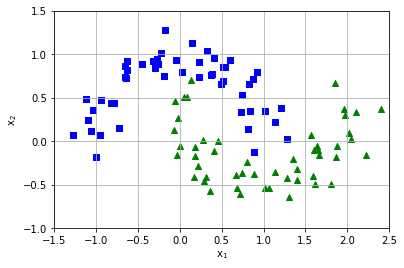

In [12]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

def plot_dataset(axes, X, y, limits):
    axes.scatter(x = X[:, 0][y == 0], y = X[:, 1][y == 0], color = 'blue', marker = 's')
    axes.scatter(x = X[:, 0][y == 1], y = X[:, 1][y == 1], color = 'green', marker = '^')
    axes.set_xlim(limits[:2])
    axes.set_ylim(limits[2:])
    axes.grid()
    axes.set_xlabel('x$_{1}$')
    axes.set_ylabel('x$_{2}$')

fig, axes = plt.subplots()
plot_dataset(axes, X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline(steps = [
    ('poly_features', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C = 10, loss = 'hinge', random_state = 42))
])

polynomial_svm_clf.fit(X = X, y = y)

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

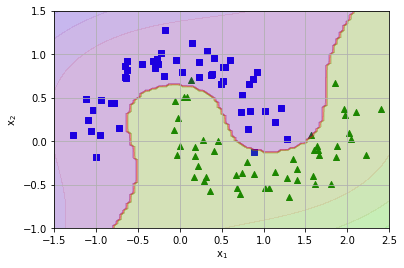

In [14]:
def plot_predictions(axes, clf, limits):
    x0s = np.linspace(limits[0], limits[1], 100)
    x1s = np.linspace(limits[2], limits[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X = X).reshape(x0.shape)
    y_decision = clf.decision_function(X = X).reshape(x1.shape)
    axes.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
    axes.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.1)
    
fig, axes = plt.subplots()
plot_dataset(axes, X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(axes, polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.show()

# Polynomial Kernel

In [15]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5))
])

poly_kernel_svm_clf.fit(X = X, y = y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [16]:
poly100_kernel_svm_clf = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 10, coef0 = 100, C = 5))
])

poly100_kernel_svm_clf.fit(X = X, y = y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

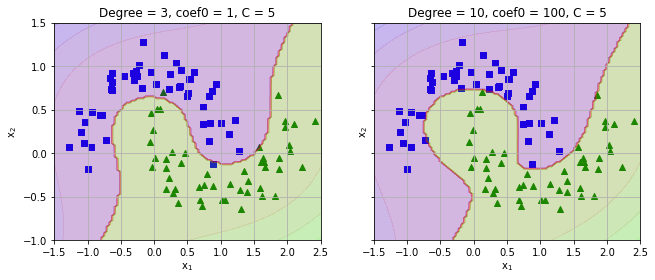

In [17]:
fig, axes = plt.subplots(ncols = 2, figsize = (10.5, 4), sharey = True)

plot_dataset(axes[0], X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(axes[0], polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
axes[0].set_title('Degree = 3, coef0 = 1, C = 5')

plot_dataset(axes[1], X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(axes[1], poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
axes[1].set_title('Degree = 10, coef0 = 100, C = 5')

plt.show()

# Adding Similarity Features

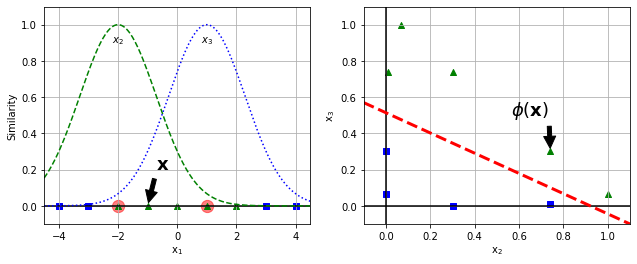

In [18]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis = 1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

fig, axes = plt.subplots(ncols = 2, figsize = (10.5, 4))

axes[0].grid()
axes[0].axhline(y = 0, color = 'black')
axes[0].scatter(x = [-2, 1], y = [0, 0], s = 150, alpha = 0.5, c = 'red')
axes[0].scatter(x = X1D[:, 0][yk == 0], y = np.zeros(4), color = 'blue', marker = 's')
axes[0].scatter(x = X1D[:, 0][yk == 1], y = np.zeros(5), color = 'green', marker = '^')
axes[0].plot(x1s, x2s, color = 'green', linestyle = 'dashed')
axes[0].plot(x1s, x3s, color = 'blue', linestyle = 'dotted')
axes[0].text(x = -2, y = 0.9, s = '$x_2$', horizontalalignment = 'center')
axes[0].text(x = 1, y = 0.9, s = '$x_3$', horizontalalignment = 'center')
axes[0].set_xlim(-4.5, 4.5)
axes[0].set_ylim(-0.1, 1.1)
axes[0].set_xlabel('x$_{1}$')
axes[0].set_ylabel('Similarity')
axes[0].annotate(r'$\mathbf{x}$',
                 xy = (X1D[3, 0], 0),
                 xytext = (-0.5, 0.20),
                 horizontalalignment = 'center',
                 arrowprops = dict(facecolor = 'black', shrink = 0.1),
                 fontsize = 18)

axes[1].grid()
axes[1].axhline(y = 0, color = 'black')
axes[1].axvline(x = 0, color = 'black')

axes[1].scatter(x = XK[:, 0][yk == 0], y = XK[:, 1][yk == 0], color = 'blue', marker = 's')
axes[1].scatter(x = XK[:, 0][yk == 1], y = XK[:, 1][yk == 1], color = 'green', marker = '^')
axes[1].set_xlim(-0.1, 1.1)
axes[1].set_ylim(-0.1, 1.1)
axes[1].set_xlabel('x$_{2}$')
axes[1].set_ylabel('x$_{3}$')
axes[1].annotate(r'$\phi\left(\mathbf{x}\right)$',
                 xy = (XK[3, 0], XK[3, 1]),
                 xytext = (0.65, 0.50),
                 horizontalalignment = 'center',
                 arrowprops = dict(facecolor = 'black', shrink = 0.1),
                 fontsize = 18)

axes[1].plot([-0.1, 1.1], [0.57, -0.1], color = 'red', linestyle = 'dashed', linewidth = 3)

plt.show()


In [19]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print(f'Phi({x1_example}, {landmark}) = {k}')

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


# Gaussian RBF Kernel

In [20]:
rbf_kernel_svm_clf = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001))
])

rbf_kernel_svm_clf.fit(X = X, y = y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

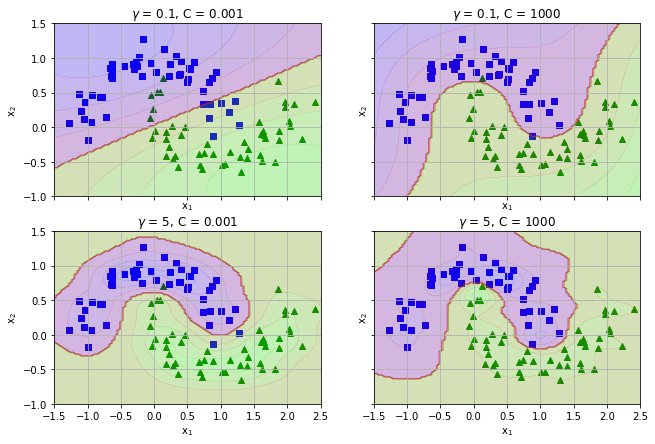

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10.5, 7), sharex = True, sharey = True)

for index, (gamma, C) in enumerate(((0.1, 0.001), (0.1, 1000), (5, 0.001), (5, 1000))):
    
    rbf_kernel_svm_clf = Pipeline(steps = [
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel = 'rbf', gamma = gamma, C = C))
    ])
    
    rbf_kernel_svm_clf.fit(X = X, y = y)
    
    row = int(index / 2)
    col = index % 2
    
    plot_dataset(axes[row][col], X, y, [-1.5, 2.5, -1, 1.5])
    plot_predictions(axes[row][col], rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
    
    axes[row][col].set_title(f'$\gamma$ = {gamma}, C = {C}')
    
plt.show()

# SVM Regression

In [22]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [23]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon = 1.5, random_state = 42)
svm_reg2 = LinearSVR(epsilon = 0.5, random_state = 42)
svm_reg1.fit(X = X, y = y)
svm_reg2.fit(X = X, y = y)

def find_support_vectors(svm_reg, X, y):
    # Could return off_margin and obtain the same plot in the cell below
    y_pred = svm_reg.predict(X = X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    #print(off_margin)
    #print(np.argwhere(off_margin))
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
print(eps_y_pred)
print(4 + 3 * eps_x1)

[6.52640746]
7


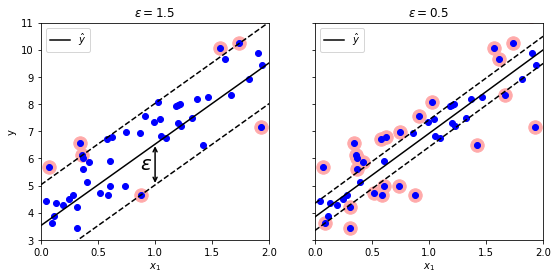

In [24]:
def plot_svm_regression(axes, svm_reg, X, y, limits):
    x1s = np.linspace(limits[0], limits[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(X = x1s)
    axes.plot(x1s, y_pred, color = 'black', linestyle = 'solid', label = r'$\hat{y}$')
    axes.plot(x1s, y_pred + svm_reg.epsilon, color = 'black', linestyle = 'dashed')
    axes.plot(x1s, y_pred - svm_reg.epsilon, color = 'black', linestyle = 'dashed')
    axes.scatter(x = X, y = y, color = 'blue', marker = 'o')
    axes.scatter(x = X[svm_reg.support_], y = y[svm_reg.support_], s = 180, facecolors = '#FFAAAA', zorder = 0)
    axes.set_xlim(limits[0], limits[1])
    axes.set_ylim(limits[2], limits[3])
    axes.set_xlabel(r'$x_{1}$')
    axes.legend()
    
fig, axes = plt.subplots(ncols = 2, figsize = (9, 4), sharey = True)
plot_svm_regression(axes[0], svm_reg1, X, y, [0, 2, 3, 11])
plot_svm_regression(axes[1], svm_reg2, X, y, [0, 2, 3, 11])
axes[0].set_ylabel('y')
axes[0].set_title(f'$\epsilon = {svm_reg1.epsilon}$')
axes[1].set_title(f'$\epsilon = {svm_reg2.epsilon}$')

axes[0].annotate(
    text = '', xy = (eps_x1, eps_y_pred), xycoords = 'data',
    xytext = (eps_x1, eps_y_pred - svm_reg1.epsilon),
    textcoords = 'data', arrowprops = {'arrowstyle': '<->', 'linewidth': 1.5}
)
axes[0].text(x = 0.87, y = 5.6, s = r'$\epsilon$', fontsize = 20)

plt.show()

In [25]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1) / 10).ravel()

In [26]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel = 'poly', degree = 2, C = 100, epsilon = 0.1, gamma = 'scale')
svm_poly_reg2 = SVR(kernel = 'poly', degree = 2, C = 0.01, epsilon = 0.1, gamma = 'scale')

svm_poly_reg1.fit(X = X, y = y)
svm_poly_reg2.fit(X = X, y = y)

SVR(C=0.01, degree=2, kernel='poly')

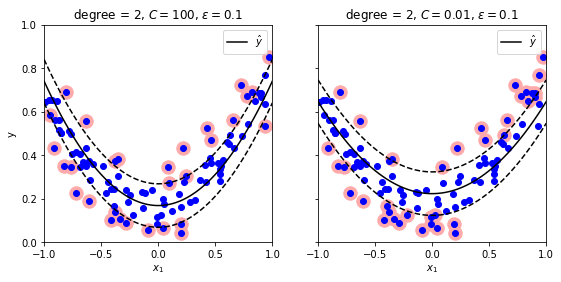

In [27]:
fig, axes = plt.subplots(ncols = 2, figsize = (9, 4), sharey = True)
plot_svm_regression(axes[0], svm_poly_reg1, X, y, [-1, 1, 0, 1])
plot_svm_regression(axes[1], svm_poly_reg2, X, y, [-1, 1, 0, 1])
axes[0].set_ylabel('y')
axes[0].set_title(f'degree = {svm_poly_reg1.degree}, $C = {svm_poly_reg1.C}$, $\epsilon = {svm_poly_reg1.epsilon}$')
axes[1].set_title(f'degree = {svm_poly_reg2.degree}, $C = {svm_poly_reg2.C}$, $\epsilon = {svm_poly_reg2.epsilon}$')
plt.show()

# Under the Hood

# Decision Function and Predictions

In [28]:
X = iris['data'][:, (2, 3)] # petal length (cm), petal width (cm)
y = (iris['target'] == 2).astype(np.float64) # 1 if Iris-Virginica, else 0

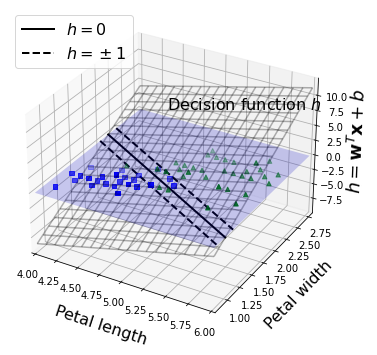

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Need to review this
def plot_3D_decision_function(axes, w, b, x1_lim = [4, 6], x2_lim = [0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s * (w[0] / w[1]) - b / w[1]
    margin_x2s_1 = -x1s * (w[0] / w[1]) - (b - 1) / w[1]
    margin_x2s_2 = -x1s * (w[0] / w[1]) - (b + 1) / w[1]
    axes.plot_surface(x1s, x2, np.zeros_like(x1),
                      color = 'blue', alpha = 0.2, cstride = 100, rstride = 100)
    axes.plot(x1s, boundary_x2s, 0, color = 'black', linestyle = 'solid', linewidth = 2, label = r'$h=0$')
    axes.plot(x1s, margin_x2s_1, 0, color = 'black', linestyle = 'dashed', linewidth = 2, label = r'$h=\pm 1$')
    axes.plot(x1s, margin_x2s_2, 0, color = 'black', linestyle = 'dashed', linewidth = 2)
    axes.scatter(X_crop[:, 0][y_crop == 1], X_crop[:, 1][y_crop == 1], 0, color = 'green', marker = '^')
    axes.plot_wireframe(x1, x2, df, alpha = 0.3, color = 'black')
    axes.scatter(X_crop[:, 0][y_crop == 0], X_crop[:, 1][y_crop == 0], 0, color = 'blue', marker = 's')
    axes.axis(x1_lim + x2_lim)
    axes.text(4.5, 2.5, 3.8, 'Decision function $h$', fontsize = 16)
    axes.set_xlabel(r'Petal length', fontsize = 16, labelpad = 10)
    axes.set_ylabel(r'Petal width', fontsize = 16, labelpad = 10)
    axes.set_zlabel(r'$h = \mathbf{w}^T \mathbf{x} + b$', fontsize = 18, labelpad = 5)
    axes.legend(loc = 'upper left', fontsize = 16)

fig = plt.figure(figsize = (11, 6))
axes = fig.add_subplot(111, projection = '3d')
plot_3D_decision_function(axes, w = svm_clf2.coef_[0], b = svm_clf2.intercept_[0])
plt.show()

# Training Objective

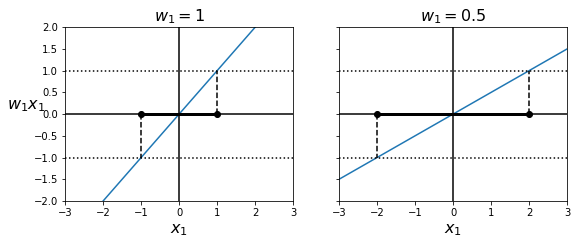

In [30]:
# Need to review this
def plot_2D_decision_function(axes, w, b, ylabel = True, x1_lim = [-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    axes.plot(x1, y)
    axes.plot(x1_lim, [1, 1], color = 'black', linestyle = 'dotted')
    axes.plot(x1_lim, [-1, -1], color = 'black', linestyle = 'dotted')
    axes.axhline(y = 0, color = 'black')
    axes.axvline(x = 0, color = 'black')
    axes.plot([m, m], [0, 1], color = 'black', linestyle = 'dashed')
    axes.plot([-m, -m], [0, -1], color = 'black', linestyle = 'dashed')
    axes.plot([-m, m], [0, 0], color = 'black', linestyle = 'solid', marker = 'o', linewidth = 3)
    axes.axis(x1_lim + [-2, 2])
    axes.set_xlabel(r'$x_1$', fontsize = 16)
    if ylabel:
        axes.set_ylabel(r'$w_1 x_1$  ', rotation = 0, fontsize = 16)
    axes.set_title(r'$w_1 = {}$'.format(w), fontsize=16)

fig, axes = plt.subplots(ncols = 2, figsize = (9, 3.2), sharey = True)
plot_2D_decision_function(axes[0], 1, 0)
plot_2D_decision_function(axes[1], 0.5, 0, ylabel = False)
plt.show()

# Online SVMs

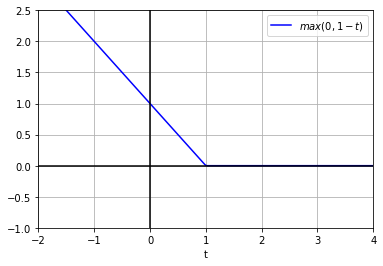

In [31]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t) # max(0, 1 - t)

fig, axes = plt.subplots()
axes.plot(t, h, color = 'blue', linestyle = 'solid', label = '$max(0, 1 - t)$')
axes.grid()
axes.axhline(y = 0, color = 'black')
axes.axvline(x = 0, color = 'black')
axes.set_xlim(-2, 4)
axes.set_ylim(-1, 2.5)
axes.set_xlabel('t')
axes.legend()
plt.show()

# Extra material

# Training time

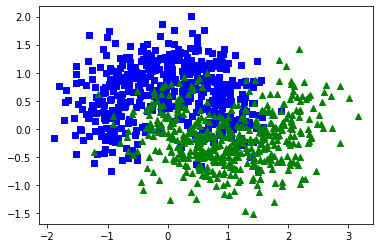

In [32]:
X, y = make_moons(n_samples = 1000, noise = 0.4, random_state = 42)


fig, axes = plt.subplots()
axes.scatter(x = X[y == 0, 0], y = X[y == 0, 1], marker = 's', color = 'blue')
axes.scatter(x = X[y == 1, 0], y = X[y == 1, 1], marker = '^', color = 'green')
plt.show()

[LibSVM]0 0.1 0.24866366386413574
[LibSVM]1 0.01 0.24048113822937012
[LibSVM]2 0.001 0.2783188819885254
[LibSVM]3 0.0001 0.5007400512695312
[LibSVM]4 1e-05 0.7790539264678955
[LibSVM]5 1.0000000000000002e-06 0.7209699153900146
[LibSVM]6 1.0000000000000002e-07 0.8043010234832764
[LibSVM]7 1.0000000000000002e-08 0.7848548889160156
[LibSVM]8 1.0000000000000003e-09 0.7423727512359619
[LibSVM]9 1.0000000000000003e-10 0.7599987983703613


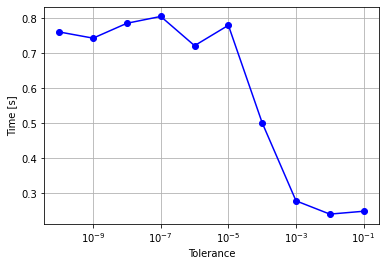

In [33]:
import time

tol = 0.1
tols = []
times = []
for i in range(10):
    svm_clf = SVC(kernel = 'poly', gamma = 3, C = 10, tol = tol, verbose = 1)
    t1 = time.time()
    svm_clf.fit(X = X, y = y)
    t2 = time.time()
    times.append(t2 - t1)
    tols.append(tol)
    print(i, tol, t2 - t1)
    tol /= 10
    
fig, axes = plt.subplots()
axes.semilogx(tols, times, color = 'blue', marker = 'o')
axes.grid()
axes.set_xlabel('Tolerance')
axes.set_ylabel('Time [s]')
plt.show()

# Linear SVM classifier implementation using Batch Gradient Descent

In [34]:
X = iris['data'][:, (2, 3)] # petal length (cm), petal width (cm)
y = (iris['target'] == 2).astype(np.float64).reshape(-1, 1) # 1 if Iris-Virginica, else 0

In [35]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C = 1, eta0 = 1, eta_d = 1000, n_epochs = 1000, random_state = None):
        self.C = C
        self.eta0 = eta0
        self.eta_d = eta_d
        self.n_epochs = n_epochs
        self.random_state = random_state
    
    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
    
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1) # n feature weights
        b = 0
        
        m = len(X)
        t = y * 2 - 1 # -1 if y == 0, +1 if y == 1
        X_t = X * t
        self.Js = []
        
        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]
            
            J = 1 / 2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)
            
            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis = 0).reshape(-1, 1)
            b_derivative = -self.C * np.sum(t_sv)
            
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            
        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self
    
    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]
    
    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)
    
C = 2
svm_clf = MyLinearSVC(C = C, eta0 = 10, eta_d = 1000, n_epochs = 60000, random_state = 2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[1.],
       [0.]])

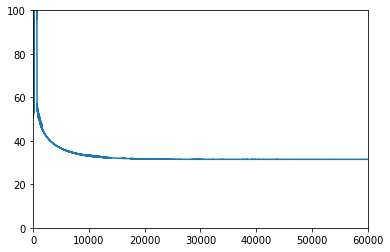

In [36]:
fig, axes = plt.subplots()
axes.plot(range(svm_clf.n_epochs), svm_clf.Js)
axes.set_xlim(0, svm_clf.n_epochs)
axes.set_ylim(0, 100)
plt.show()

In [37]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [38]:
svm_clf2 = SVC(kernel = 'linear', C = C)
svm_clf2.fit(X = X, y = y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


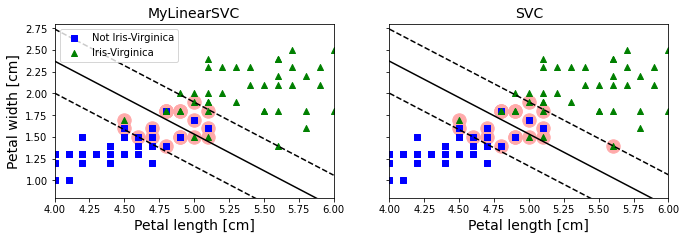

In [39]:
yr = y.ravel()
fig, axes = plt.subplots(ncols = 2, figsize = (11, 3.2), sharey = True)
axes[0].scatter(x = X[:, 0][yr == 0], y = X[:, 1][yr == 0], color = 'blue', marker = 's', label = 'Not Iris-Virginica')
axes[0].scatter(x = X[:, 0][yr == 1], y = X[:, 1][yr == 1], color = 'green', marker = '^', label = 'Iris-Virginica')
plot_svc_decision_boundary(axes[0], svm_clf, 4, 6)
axes[0].set_xlabel('Petal length [cm]', fontsize = 14)
axes[0].set_ylabel('Petal width [cm]', fontsize = 14)
axes[0].set_title('MyLinearSVC', fontsize = 14)
axes[0].set_xlim(4, 6)
axes[0].set_ylim(0.8, 2.8)
axes[0].legend(loc = "upper left")

axes[1].scatter(x = X[:, 0][yr == 0], y = X[:, 1][yr == 0], color = 'blue', marker = 's', label = 'Not Iris-Virginica')
axes[1].scatter(x = X[:, 0][yr == 1], y = X[:, 1][yr == 1], color = 'green', marker = '^', label = 'Iris-Virginica')
plot_svc_decision_boundary(axes[1], svm_clf2, 4, 6)
axes[1].set_xlabel('Petal length [cm]', fontsize = 14)
axes[1].set_title('SVC', fontsize = 14)
axes[1].set_xlim(4, 6)
axes[1].set_ylim(0.8, 2.8)

plt.show()

[-12.52988101   1.94162342   1.84544824]


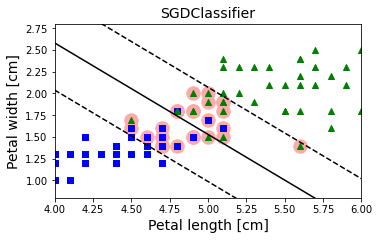

In [40]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', alpha = 0.017, max_iter = 1000, tol = 1e-3, random_state = 42)
sgd_clf.fit(X = X, y = y.ravel())

m = len(X)
t = y * 2 - 1 # -1 if y == 0, +1 if y == 1
X_b = np.c_[np.ones((m, 1)), X]  # Add bias input x0 = 1
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

fig, axes = plt.subplots(figsize = (5.5, 3.2))
axes.scatter(x = X[:, 0][yr == 0], y = X[:, 1][yr == 0], color = 'blue', marker = 's', label = 'Not Iris-Virginica')
axes.scatter(x = X[:, 0][yr == 1], y = X[:, 1][yr == 1], color = 'green', marker = '^', label = 'Iris-Virginica')
plot_svc_decision_boundary(axes, sgd_clf, 4, 6)
axes.set_xlabel('Petal length [cm]', fontsize = 14)
axes.set_ylabel('Petal width [cm]', fontsize = 14)
axes.set_title('SGDClassifier', fontsize = 14)
axes.set_xlim(4, 6)
axes.set_ylim(0.8, 2.8)
plt.show()

# Exercise 1

Pages 155-156: You can think of an SVM classifier as fitting the widest possible street between two classes.

An SVM classifier tries to differentiate points of different classes by finding a hyperplane that maximizes the margins between the classes in the training data.

# Exercise 2

Page 156: The instances located on the edge of the street/margin referenced above.
Also see Figure 5-1.

# Exercise 3

Page 156: SVMs are sensitive to the feature scales.
Also see Figure 5-2.

# Exercise 4

Page 158: Output scores: Yes; Probabilities: No.

An SVM classifier can output the distance between the instance and the decision boundary and you can use this as a confidence score.

# Exercise 5

Page 158: "... set the dual hyperparameter to False, unless there are more features than training instances ...".
Therefore, in this case, use the primal form.
Also see page 164.

# Exercise 6

Page 162: If the model is underfitting, increase gamma and/or C.

# Exercise 7

Page 169 discusses Quadratic Programming (QP) problems.

Let the QP parameters for the hard-margin problem be H', f', A', and b'. The QP parameters for the soft-margin problem have m additional parameters (np = n + 1 + m) and m additional constraints (nc = 2m). The QP parameters for the soft-margin problem would be
- H is equal to H', plus m columns of 0s on the right and m rows of 0s at the bottom
- f is equal to f', with m additional elements, all equal to the value of the hyperparameter C
- b is equal to b', with m additional elements, all equal to 0
- A is equal to A', with an extra m * m identity matrix appended to the right

# Exercise 8

Exercise: train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [41]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris['data'][:, (2, 3)] # petal length (cm), petal width (cm)
y = iris['target'] # 0 = Iris-Setosa, 1 = Iris-Versicolour, 2 = Iris-Virginica

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [42]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss = 'hinge', C = C, random_state = 42)
svm_clf = SVC(kernel = 'linear', C = C)
sgd_clf = SGDClassifier(loss = 'hinge', learning_rate = 'constant', eta0 = 0.001, alpha = alpha,
                        max_iter = 1000, tol = 1e-3, random_state = 42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X = X_scaled, y = y)
svm_clf.fit(X = X_scaled, y = y)
sgd_clf.fit(X = X_scaled, y = y)

print('LinearSVC:                      ', lin_clf.intercept_, lin_clf.coef_)
print('SVC:                            ', svm_clf.intercept_, svm_clf.coef_)
print(f'SGDClassifier(alpha = {alpha}):', sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                       [0.28475098] [[1.05364854 1.09903804]]
SVC:                             [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha = 0.002): [0.117] [[0.77714169 0.72981762]]


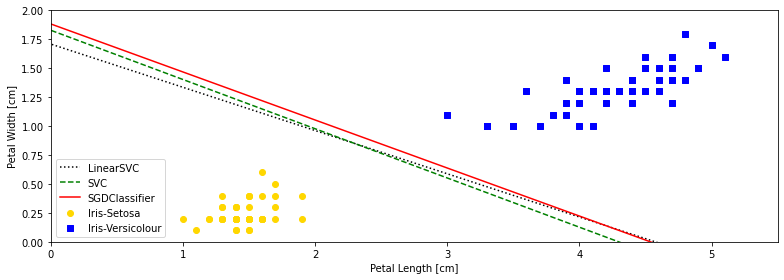

In [43]:
fig, axes = plt.subplots(figsize = (11, 4))

axes.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color = 'gold', marker = 'o', label = 'Iris-Setosa')
axes.scatter(x = X[y == 1, 0], y = X[y == 1, 1], color = 'blue', marker = 's', label = 'Iris-Versicolour')
axes.set_xlabel('Petal Length [cm]')
axes.set_ylabel('Petal Width [cm]')
axes.set_xlim(0, 5.5)
axes.set_ylim(0, 2)

# Compute the slope and bias of each decision boundary
# a*x + b*y + c = 0 -> y = (-a/b)*x + (-c/b)
# So weight = w = -a/b and bias = b = -c/b
w1 = -1.0 * lin_clf.coef_[0][0] / lin_clf.coef_[0][1]
b1 = -1.0 * lin_clf.intercept_[0] / lin_clf.coef_[0][1]
w2 = -1.0 * svm_clf.coef_[0][0] / svm_clf.coef_[0][1]
b2 = -1.0 * svm_clf.intercept_[0] / svm_clf.coef_[0][1]
w3 = -1.0 * sgd_clf.coef_[0][0] / sgd_clf.coef_[0][1]
b3 = -1.0 * sgd_clf.intercept_[0] / sgd_clf.coef_[0][1]

#x_values = np.linspace(0, 5.5, 100)
#y_1 = w1 + x_values + b1
#axes.plot(x_values, y_1)
# Transform the decision boundary values back to the original scale
# In the above cell, scaler transformed a matrix with two columns
# That is, it operates on pairs of numbers (x, y) = (x, m * x + b)
# Below, we use x = -10 and x = 10
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])
axes.plot(line1[:, 0], line1[:, 1], color = 'black', linestyle = 'dotted', label = 'LinearSVC')
axes.plot(line2[:, 0], line2[:, 1], color = 'green', linestyle = 'dashed', label = 'SVC')
axes.plot(line3[:, 0], line3[:, 1], color = 'red', linestyle = 'solid', label = 'SGDClassifier')

axes.legend()
fig.tight_layout()
plt.show()

# Exercise 9

Exercise: train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [44]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)

In [45]:
X = mnist['data']
y = mnist['target'].astype(np.uint8)

# Customary to use first 60000 samples as training set, and last 10000 samples as test set
# Dataset has already been shuffled
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [46]:
# Uses One-vs-All (also called One-vs-the-Rest, OvR) strategy
lin_clf = LinearSVC(random_state = 42)
lin_clf.fit(X = X_train, y = y_train)

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=42)

In [47]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
print(accuracy_score(y_true = y_train, y_pred = y_pred))

print(sum(true == pred for true, pred in zip(y_train, y_pred)) / len(y_train))

0.8348666666666666
0.8348666666666666


In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X = X_train)
X_test_scaled = scaler.transform(X = X_test) # transform, not fit_transform

In [49]:
lin_clf = LinearSVC(random_state = 42)
lin_clf.fit(X = X_train_scaled, y = y_train)

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=42)

In [50]:
y_pred = lin_clf.predict(X_train_scaled)
print(accuracy_score(y_true = y_train, y_pred = y_pred))

print(sum(true == pred for true, pred in zip(y_train, y_pred)) / len(y_train))

0.9214
0.9214


In [51]:
svm_clf = SVC(gamma = 'scale')
svm_clf.fit(X = X_train_scaled[:10000], y = y_train[:10000]) # just use part of the training set

SVC()

In [52]:
y_pred = svm_clf.predict(X_train_scaled)
print(accuracy_score(y_true = y_train, y_pred = y_pred))

print(sum(true == pred for true, pred in zip(y_train, y_pred)) / len(y_train))

0.9455333333333333
0.9455333333333333


In [53]:
# Use a small dataset, and tune the hyperparameters by doing a randomized search with cross validation
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(estimator = svm_clf, param_distributions = param_distributions, n_iter = 10, verbose = 2, cv = 3)
rnd_search_cv.fit(X = X_train_scaled[:1000], y = y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=5.847490967837556, gamma=0.004375955271336425; total time=   0.3s
[CV] END ....C=5.847490967837556, gamma=0.004375955271336425; total time=   0.3s
[CV] END ....C=5.847490967837556, gamma=0.004375955271336425; total time=   0.3s
[CV] END ....C=2.544266730893301, gamma=0.024987648190235304; total time=   0.3s
[CV] END ....C=2.544266730893301, gamma=0.024987648190235304; total time=   0.3s
[CV] END ....C=2.544266730893301, gamma=0.024987648190235304; total time=   0.3s
[CV] END ....C=2.199505425963898, gamma=0.009340106304825553; total time=   0.3s
[CV] END ....C=2.199505425963898, gamma=0.009340106304825553; total time=   0.3s
[CV] END ....C=2.199505425963898, gamma=0.009340106304825553; total time=   0.3s
[CV] END .....C=7.327377306009368, gamma=0.04329656504133618; total time=   0.3s
[CV] END .....C=7.327377306009368, gamma=0.04329656504133618; total time=   0.3s
[CV] END .....C=7.327377306009368, gamma=0.04329

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1340dff10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x134908f70>},
                   verbose=2)

In [54]:
rnd_search_cv.best_estimator_

SVC(C=3.8786881587000437, gamma=0.0017076019229344522)

In [55]:
rnd_search_cv.best_score_

0.8599947252641863

In [56]:
rnd_search_cv.best_estimator_.fit(X = X_train_scaled, y = y_train)

SVC(C=3.8786881587000437, gamma=0.0017076019229344522)

In [57]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
print(accuracy_score(y_true = y_train, y_pred = y_pred))

print(sum(true == pred for true, pred in zip(y_train, y_pred)) / len(y_train))

0.9978166666666667
0.9978166666666667


In [58]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
print(accuracy_score(y_true = y_test, y_pred = y_pred))

print(sum(true == pred for true, pred in zip(y_test, y_pred)) / len(y_test))

0.9717
0.9717


# Exercise 10

Exercise: train an SVM regressor on the California housing dataset.

In [59]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing['data']
y = housing['target']

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X = X_train)
X_test_scaled = scaler.transform(X = X_test)

In [62]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state = 42)
lin_svr.fit(X = X_train_scaled, y = y_train)

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=42)

In [63]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X = X_train_scaled)
mse = mean_squared_error(y_true = y_train, y_pred = y_pred)
print(mse)

0.9641780189948642


In [64]:
print(np.sqrt(mse))
# Equation on page 42
print(np.sqrt(sum(np.power(pred - true, 2) / len(y_train) for pred, true in zip(y_pred, y_train))))

0.9819256687727764
0.9819256687727776


In [65]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(estimator = SVR(), param_distributions = param_distributions, n_iter = 10, verbose = 2, cv = 3, random_state = 42)
rnd_search_cv.fit(X = X_train_scaled, y = y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   8.3s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   8.5s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   8.6s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   8.5s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   8.3s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   8.7s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   8.5s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   8.4s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   8.3s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   7.9s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   8.0s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1340f00d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13418fc70>},
                   random_state=42, verbose=2)

In [66]:
print(rnd_search_cv.best_estimator_)

SVR(C=4.745401188473625, gamma=0.07969454818643928)


In [67]:
y_pred = rnd_search_cv.best_estimator_.predict(X = X_train_scaled)
mse = mean_squared_error(y_true = y_train, y_pred = y_pred)
print(np.sqrt(mse))

0.5727524770785359


In [68]:
# Evaluate with test set
y_pred = rnd_search_cv.best_estimator_.predict(X = X_test_scaled)
mse = mean_squared_error(y_true = y_test, y_pred = y_pred)
print(np.sqrt(mse))

0.5929168385528734
